**Predictive Modeling (Regeresion)**

*Load Dataset*

In [29]:
import pandas as pd

df= pd.read_csv(r'C:\Users\JEAN JEASEN\Documents\Codveda\Data Set For Task\4) house Prediction Data Set.csv')
df.head()
df.info()  
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 1 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0    0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00  505 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00    0
dtype: int64

*Split dataset into training and testing(70:30)*

In [30]:
from sklearn.model_selection import train_test_split

# Split the single column into separate columns
df_split = df[df.columns[0]].str.split(expand=True)
df_split.columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

# Features and target
X = df_split.drop('MEDV', axis=1).astype(float)
y = df_split['MEDV'].astype(float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


*Train a Linear Regeresion model using scikit-learn*

In [31]:
from sklearn.linear_model import LinearRegression

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# Show train and test accuracy (R^2 score)
train_score = lr_model.score(X_train, y_train)
test_score = lr_model.score(X_test, y_test)

print(f"Train R^2 Score: {train_score:.2f}")
print(f"Test R^2 Score: {test_score:.2f}")

Train R^2 Score: 0.74
Test R^2 Score: 0.71


*Evaluate Model Using Perfomance Metrics (MSE & R-Squared)*

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error (MSE): 18.89
R-squared: 0.71


*Train Model With Decision Tress*

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Train and test accuracy (R^2 score)
dt_train_score = dt_model.score(X_train, y_train)
dt_test_score = dt_model.score(X_test, y_test)

print(f"Decision Tree Train R^2 Score: {dt_train_score:.2f}")
print(f"Decision Tree Test R^2 Score: {dt_test_score:.2f}")

Decision Tree Train R^2 Score: 1.00
Decision Tree Test R^2 Score: 0.78


*Evaluate Decision Trees Model Using Perfomance Metrics(MSE & R-Squared)*

In [35]:
# Predict on the test set
dt_y_pred = dt_model.predict(X_test)

# Evaluate using MSE and R-squared
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

print(f"Decision Tree Mean Squared Error (MSE): {dt_mse:.2f}")
print(f"Decision Tree R-squared: {dt_r2:.2f}")

Decision Tree Mean Squared Error (MSE): 14.45
Decision Tree R-squared: 0.78


*Train Model With Random Forest*

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Train and test accuracy (R^2 score)
rf_train_score = rf_model.score(X_train, y_train)
rf_test_score = rf_model.score(X_test, y_test)

print(f"Random Forest Train R^2 Score: {rf_train_score:.2f}")
print(f"Random Forest Test R^2 Score: {rf_test_score:.2f}")



Random Forest Train R^2 Score: 0.98
Random Forest Test R^2 Score: 0.85


*Evaluate Random Forest Model Using Perfomance Metrics(MSE & R-Squared)*

In [41]:
# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate using MSE and R-squared
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Random Forest R-squared: {rf_r2:.2f}")

Random Forest Mean Squared Error (MSE): 10.02
Random Forest R-squared: 0.85


*Visualization Comparison of 3 Predective Regresion Model*

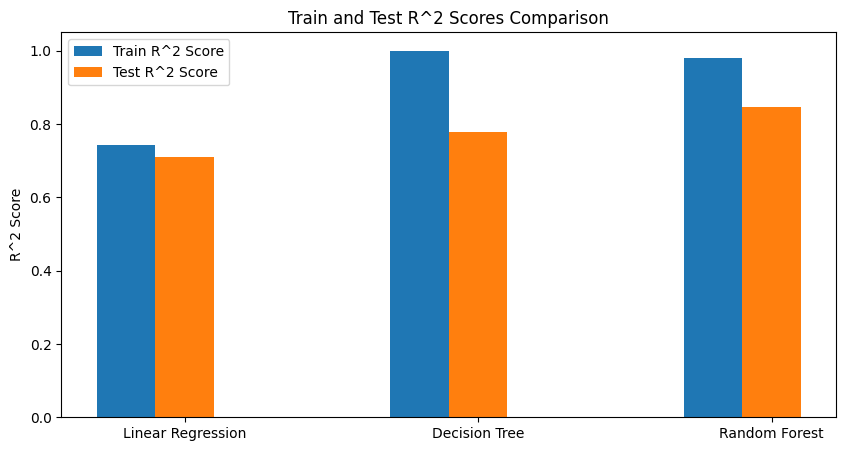

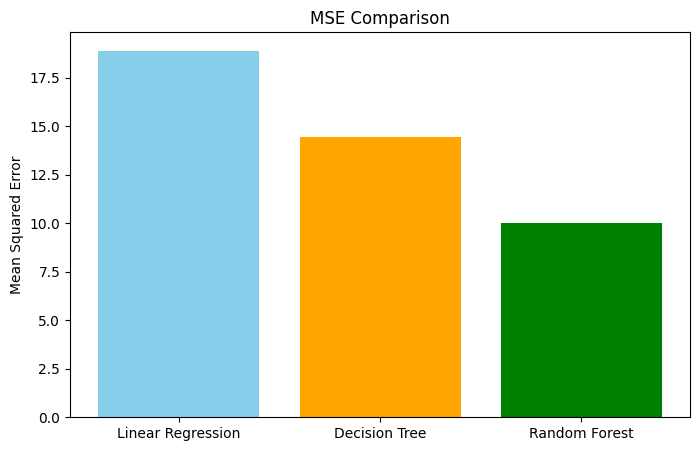

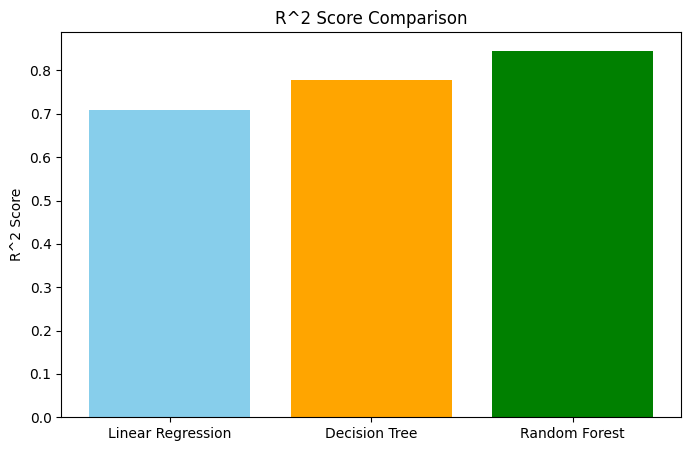

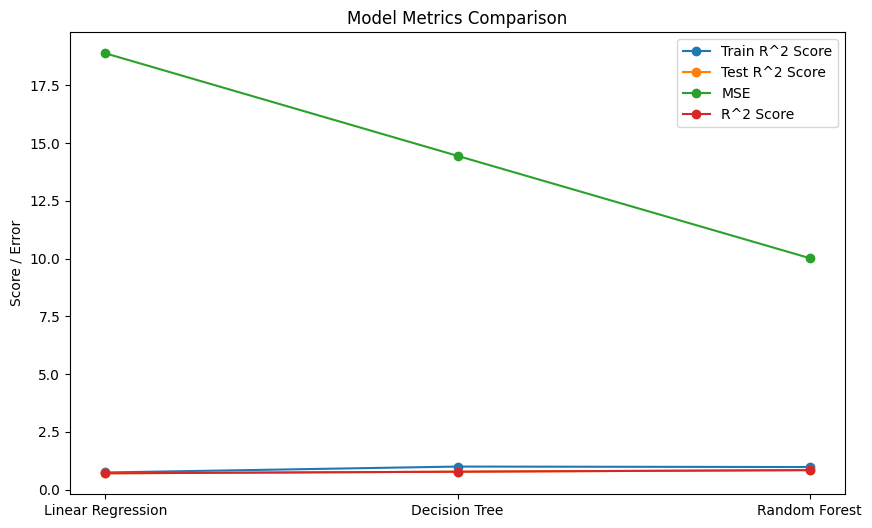

In [38]:
import numpy as np

import matplotlib.pyplot as plt

# Prepare data for comparison
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
train_scores = [train_score, dt_train_score, rf_train_score]
test_scores = [test_score, dt_test_score, rf_test_score]
mses = [mse, dt_mse, rf_mse]
r2s = [r2, dt_r2, rf_r2]

x = np.arange(len(models))
width = 0.2

# Bar chart for Train/Test Scores
plt.figure(figsize=(10, 5))
plt.bar(x - width, train_scores, width, label='Train R^2 Score')
plt.bar(x, test_scores, width, label='Test R^2 Score')
plt.xticks(x, models)
plt.ylabel('R^2 Score')
plt.title('Train and Test R^2 Scores Comparison')
plt.legend()
plt.show()

# Bar chart for MSE
plt.figure(figsize=(8, 5))
plt.bar(models, mses, color=['skyblue', 'orange', 'green'])
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison')
plt.show()

# Bar chart for R^2
plt.figure(figsize=(8, 5))
plt.bar(models, r2s, color=['skyblue', 'orange', 'green'])
plt.ylabel('R^2 Score')
plt.title('R^2 Score Comparison')
plt.show()

# Line chart for all metrics
plt.figure(figsize=(10, 6))
plt.plot(models, train_scores, marker='o', label='Train R^2 Score')
plt.plot(models, test_scores, marker='o', label='Test R^2 Score')
plt.plot(models, mses, marker='o', label='MSE')
plt.plot(models, r2s, marker='o', label='R^2 Score')
plt.title('Model Metrics Comparison')
plt.ylabel('Score / Error')
plt.legend()
plt.show()

Conclusion:
- Linear Regression has moderate performance, but is outperformed by tree-based models.
- Decision Tree achieves perfect train score (overfitting), but lower test performance than Random Forest.
- Random Forest achieves the best test R^2 and lowest MSE, indicating the best generalization among the three.